<a href="https://colab.research.google.com/github/Nolanole/DS-Unit-2-Sprint-4-Practicing-Understanding/blob/master/Josh_Mancuso_DS3_Unit_2_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science Unit 2_
 
 # Sprint Challenge: Practicing & Understanding Predictive Modeling

### Chicago Food Inspections

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 2010 to March 2019. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to load the data:

In [0]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)

###Part 1: Preprocessing
You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding. (Pandas, category_encoders, sklearn.preprocessing, or any other library.)

To earn a score of 3 for this part, find and explain leakage. The dataset has a feature that will give you an ROC AUC score > 0.90 if you process and use the feature. Find the leakage and explain why the feature shouldn't be used in a real-world model to predict the results of future inspections.

In [2]:
train.head(10).T

,0,1,2,3,4,5,6,7,8,9
Inspection ID,2088270,555268,1751394,1763905,453326,1725221,1981372,1072403,1464616,583261
DBA Name,"TOM YUM RICE & NOODLE, INC.",FILLING STATION & CONVENIENCE STORE,A P DELI,FRANK'S CHICAGO SHRIMP HOUSE,MORRILL,LAKEVIEW REHABILITATION AND NURSING CENTER,GOLD COAST DOGS,HAPPY PIZZA,THE PUMPING CO INC,YUMMY YUMMY NOODLES
AKA Name,TOM YUM CAFE,FILLING STATION & CONVENIENCE STORE,A P DELI,FRANK'S CHICAGO SHRIMP HOUSE,MORRILL,LAKEVIEW REHABILITATION AND NURSING CENTER,GOLD COAST DOGS,NaN,THE PUMPING CO,YUMMY YUMMY NOODLES
License #,2.35491e+06,1.0449e+06,47405,6414,24571,2.24558e+06,32318,2.24103e+06,1.54494e+06,2.098e+06
Facility Type,Restaurant,Grocery Store,Restaurant,Restaurant,School,Long Term Care,Restaurant,Restaurant,Restaurant,Restaurant
Risk,Risk 1 (High),Risk 3 (Low),Risk 1 (High),Risk 2 (Medium),Risk 1 (High),Risk 1 (High),Risk 2 (Medium),Risk 1 (High),Risk 1 (High),Risk 1 (High)
Address,608 W BARRY,6646-6658 S WESTERN AVE,2025 E 75TH ST,4459 S ARCHER AVE,6011 S Rockwell (2600W) AVE,735 W DIVERSEY PKWY,225 S CANAL ST,8710 S HALSTED ST,6157 N BROADWAY,2002 S WENTWORTH AVE
City,CHICAGO,CHICAGO,CHICAGO,CHICAGO,CHICAGO,CHICAGO,CHICAGO,CHICAGO,CHICAGO,CHICAGO
State,IL,IL,IL,IL,IL,IL,IL,IL,IL,IL
Zip,60657,60636,60649,60632,60629,60614,60606,60620,60660,60616


Several columns are essentially duplicitave, can drop the one that dont really add any new info: DBA Name, AKA Name, and license # all are basically identifiers, so we can just keep DBA name since it has no null values, and drop the other 2. 

Address also is basically duplicative identifier,  so we'll drop that also. 

Since city, and zip code basically give the same info, we'll drop city and keep zip code since it is more specific. Latitude, longitude, and location give mor detailed location information, but similar to address, it is extremely specific and somewhat duplicitave of the restaurant/business name/id, so we will drop those columns.

All data come from the state of IL so theres nothing useful from this feature, so well drop that as well.

Finally, the Violations feature contains a list combining numbers representing category for a violation type and strings describing the violation. This would require extensive regex cleaning/manipulaion to extract anything meaningful for data analysis/predictive modelling, gonna just skip for now due to time constraints.




In [3]:
drop_cols = ['AKA Name', 'License #', 'Address', 'City', 'State','Latitude', 'Longitude', 'Location', 'Violations', 'Inspection Date']

train_copy = train.copy()
test_copy = test.copy()
train_copy.drop(columns=drop_cols, inplace=True)
test_copy.drop(columns=drop_cols, inplace=True)

train_copy.head()

,Inspection ID,DBA Name,Facility Type,Risk,Zip,Inspection Type,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",Restaurant,Risk 1 (High),60657.0,Canvass,1
1,555268,FILLING STATION & CONVENIENCE STORE,Grocery Store,Risk 3 (Low),60636.0,Complaint Re-Inspection,0
2,1751394,A P DELI,Restaurant,Risk 1 (High),60649.0,Canvass Re-Inspection,0
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,Restaurant,Risk 2 (Medium),60632.0,Canvass,0
4,453326,MORRILL,School,Risk 1 (High),60629.0,Canvass,0


In [4]:
train_copy.isna().sum()

Inspection ID        0
DBA Name             0
Facility Type      224
Risk                12
Zip                 26
Inspection Type      1
Fail                 0
dtype: int64

In [0]:
#Clean the nulls: 
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
cols = train_copy.columns

train_copy = pd.DataFrame(imputer.fit_transform(train_copy), columns=cols)
test_copy = pd.DataFrame(imputer.transform(test_copy), columns=cols)

In [6]:
test_copy.isna().sum()

Inspection ID      0
DBA Name           0
Facility Type      0
Risk               0
Zip                0
Inspection Type    0
Fail               0
dtype: int64

In [0]:
inspection_type_cats = ['Canvass', 'License', 'Canvass Re-Inspection', 'Complaint', 
                        'License Re-Inspection', 'Complaint Re-Inspection', 
                        'Short Form Complaint']
facility_type_cats = ['Restaurant', 'Grocery Store', 'School', 'Bakery',
                      'Daycare (2 - 6 Years)', "Children's Services Facility", 
                      'Daycare Above and Under 2 Years', 'Long Term Care',
                      'Catering', 'Mobile Food Dispenser', 'Liquor']

int_cols = ['Inspection ID', 'Fail']

cat_cols = ['Facility Type', 'Risk', 'Zip', 'Inspection Type']

def wrangle(X):
  X = X.copy()
  
  #Combine low frequency inspection types into 'Other' category
  for i in range(len(X)):
    X.at[i, 'Inspection Type'] = X.at[i, 'Inspection Type'] if X.at[i, 'Inspection Type'] in inspection_type_cats else 'Other'
    X.at[i, 'Facility Type'] = X.at[i, 'Facility Type'] if X.at[i, 'Facility Type'] in facility_type_cats else 'Other'
  
  for col in int_cols:
    X[col] = X[col].astype('int')
  for col in cat_cols:
    X[col] = X[col].astype('category')
  
  return X

train_copy = wrangle(train_copy)
test_copy = wrangle(test_copy)

In [8]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51916 entries, 0 to 51915
Data columns (total 7 columns):
Inspection ID      51916 non-null int64
DBA Name           51916 non-null object
Facility Type      51916 non-null category
Risk               51916 non-null category
Zip                51916 non-null category
Inspection Type    51916 non-null category
Fail               51916 non-null int64
dtypes: category(4), int64(2), object(1)
memory usage: 1.4+ MB


###Part 2: Modeling
Fit a model with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation to do hyperparameter optimization, and estimate your ROC AUC validation score.

Use your model to predict probabilities for the test set. Get an ROC AUC test score >= 0.60.

To earn a score of 3 for this part, get an ROC AUC test score >= 0.70 (without using the feature with leakage).

In [0]:
#features for predictive model:
target = 'Fail'

X_train = train_copy.drop(columns=[target])
y_train = train_copy[target]

X_test = test_copy.drop(columns=[target])
y_test = test_copy[target]

In [10]:
X_test.head()

,Inspection ID,DBA Name,Facility Type,Risk,Zip,Inspection Type
0,114835,7 - ELEVEN,Grocery Store,Risk 2 (Medium),60605.0,Canvass
1,1575555,TAQUERIA LOS GALLOS INC,Restaurant,Risk 1 (High),60623.0,Canvass
2,671061,TROTTER'S TO GO,Restaurant,Risk 1 (High),60614.0,Canvass
3,1965844,BIG G'S PIZZA,Restaurant,Risk 1 (High),60607.0,Canvass Re-Inspection
4,1751669,SOUTH CENTRAL COMMUNITY SERVICES ELEMENTARY,School,Risk 2 (Medium),60619.0,Canvass


In [11]:
!pip install category_encoders

In [0]:
import category_encoders as ce

encoder = ce.OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [13]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators' : [50, 200, 500],
    'max_depth': [2,3,5,10],
}

search = RandomizedSearchCV(
    xgb.XGBClassifier(n_jobs=-1, random_state=42),
    param_distributions= param_distributions,
    n_iter=5,
    cv=3,
    scoring='roc_auc',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   55.4s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [50, 200, 500], 'max_depth': [2, 3, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=10)

In [14]:
results = pd.DataFrame(search.cv_results_)
results.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
2,12.215573,0.038659,0.400619,0.013612,500,3,"{'n_estimators': 500, 'max_depth': 3}",0.718896,0.724821,0.701136,0.714951,0.010064,1,0.771245,0.771338,0.767395,0.769993,0.001837
4,4.403793,0.753394,0.155058,0.019549,200,3,"{'n_estimators': 200, 'max_depth': 3}",0.708329,0.715308,0.702972,0.708870,0.005051,2,0.740583,0.737685,0.735602,0.737957,0.002042
1,9.485566,0.032257,0.279093,0.000273,500,2,"{'n_estimators': 500, 'max_depth': 2}",0.705338,0.715642,0.693559,0.704846,0.009022,3,0.734477,0.734594,0.732332,0.733801,0.001040
3,3.793802,0.015565,0.118673,0.000985,200,2,"{'n_estimators': 200, 'max_depth': 2}",0.693912,0.704514,0.706530,0.701652,0.005535,4,0.713661,0.712326,0.710330,0.712105,0.001369
0,1.299347,0.010388,0.047807,0.001287,50,3,"{'n_estimators': 50, 'max_depth': 3}",0.691741,0.699959,0.701196,0.697632,0.004196,5,0.707088,0.706987,0.704967,0.706347,0.000977


In [15]:
from sklearn.metrics import roc_auc_score

best = search.best_estimator_
y_pred_proba = best.predict_proba(X_test)[:,1]

print('Test ROC AUC:', roc_auc_score(y_test, y_pred_proba))

Test ROC AUC: 0.7212351284358892


###Part 3: Visualization
Make one visualization for model interpretation. (You may use any libraries.) Choose one of these types:

- Feature Importances
- Permutation Importances
- Partial Dependence Plot
- Shapley Values

To earn a score of 3 for this part, make at least two of these visualization types.

###Feature Importances

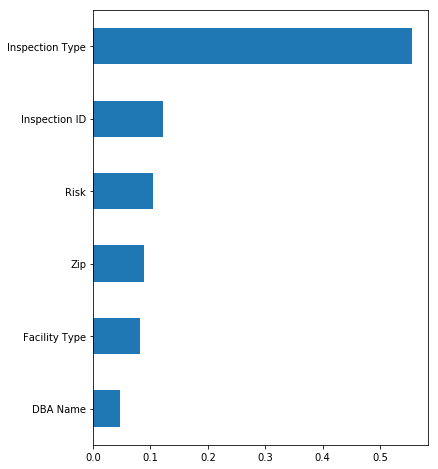

In [16]:
from matplotlib import pyplot as plt

figsize = (6,8)

importances = pd.Series(best.feature_importances_, X_train.columns)

plt.figure(figsize=figsize)
importances.sort_values().plot.barh()

###Permutation Importances

In [0]:
!pip install eli5

In [18]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(best, scoring='roc_auc', cv='prefit', n_iter=3, random_state=42)

permuter.fit(X_test, y_test)

feature_names = X_test.columns.tolist()
eli5.show_weights(permuter, top=None, feature_names=feature_names)

Weight,Feature
0.1592 ± 0.0055,Inspection Type
0.0532 ± 0.0014,Inspection ID
0.0268 ± 0.0041,Zip
0.0088 ± 0.0012,Facility Type
0.0026 ± 0.0009,Risk
0.0004 ± 0.0016,DBA Name


###Partial Dependence Plot

In [0]:
!pip install pdpbox

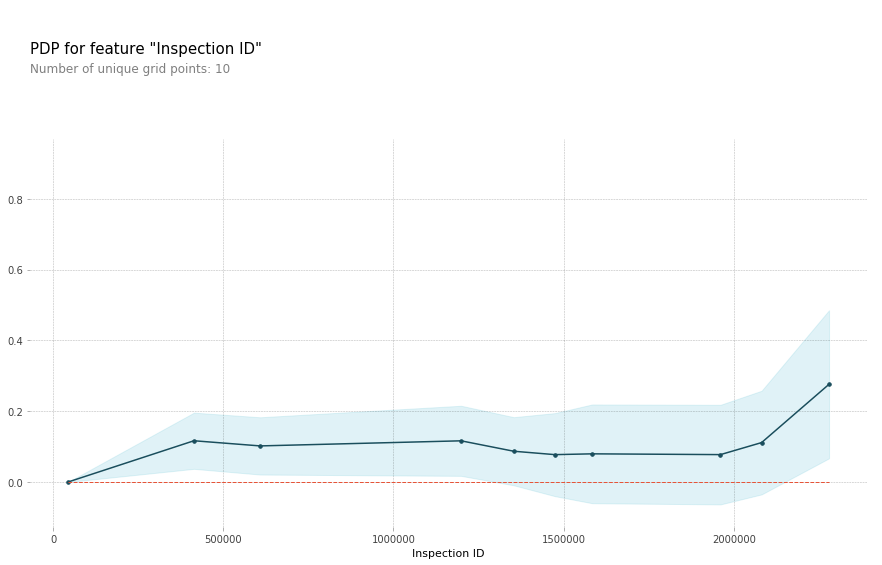

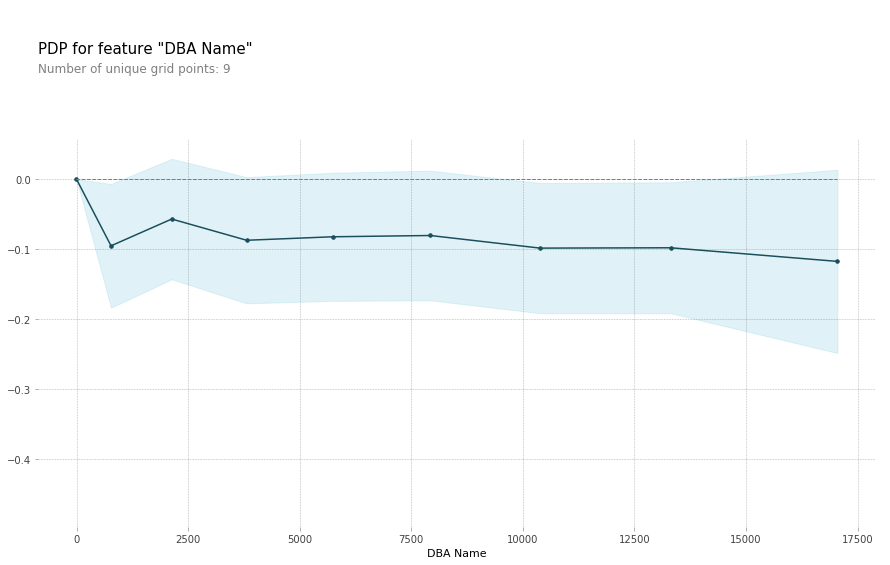

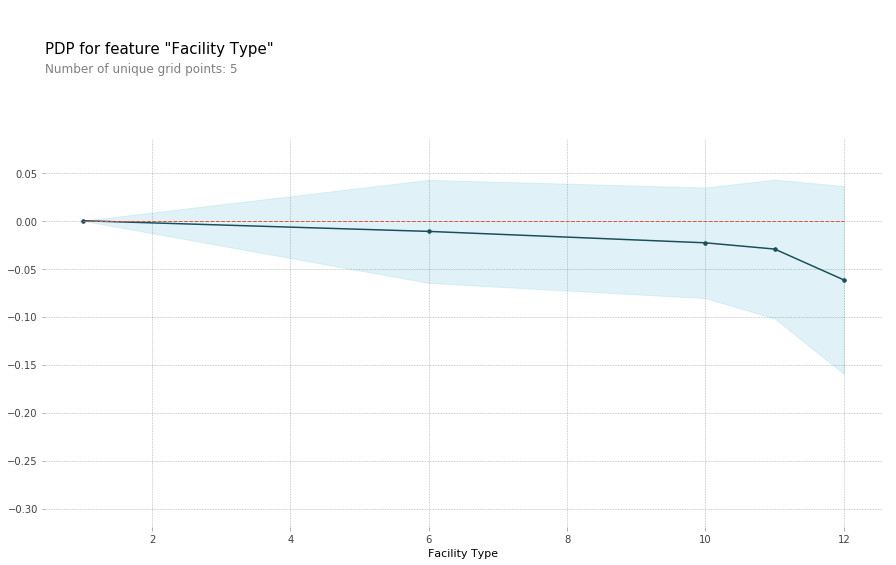

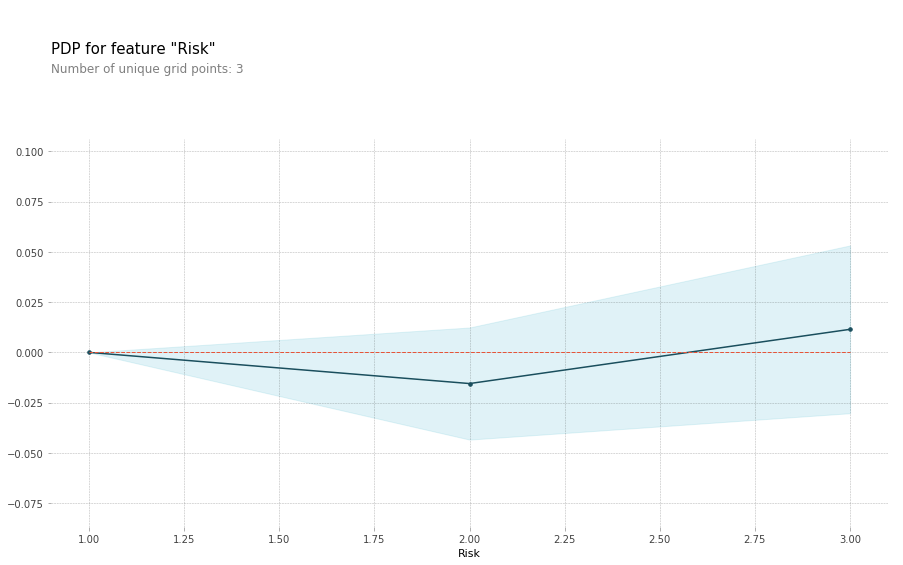

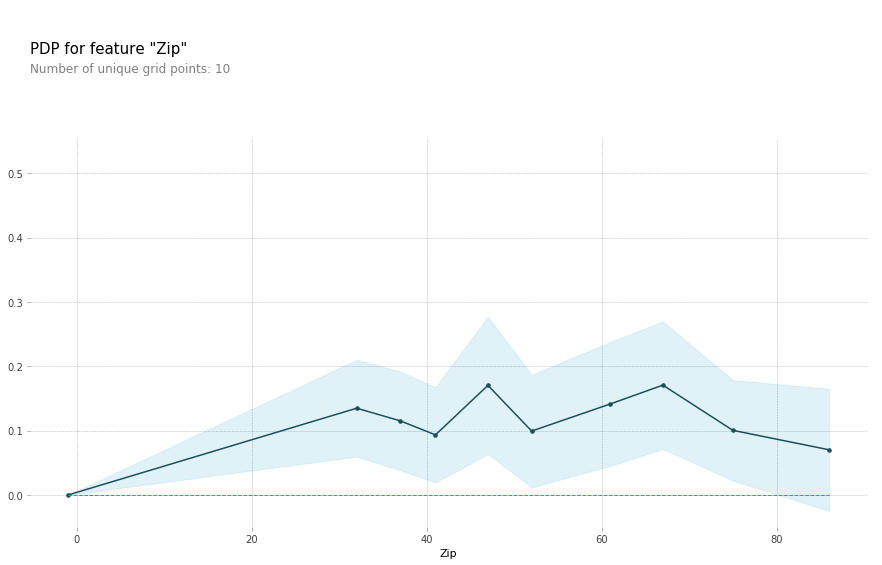

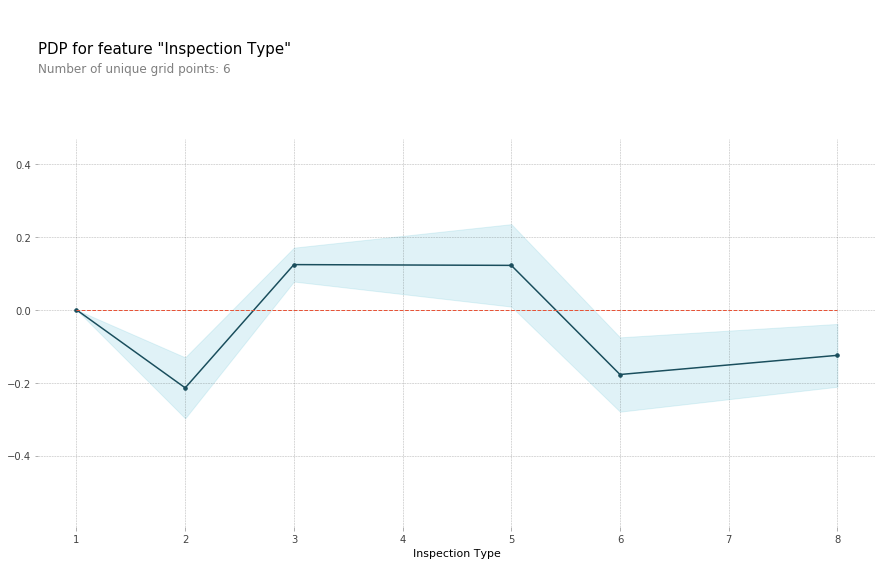

In [20]:
from pdpbox.pdp import pdp_isolate, pdp_plot

for f in X_test.columns:
  isolated = pdp_isolate(
      model = best,
      dataset = X_test,
      model_features = X_test.columns,
      feature = f)
  pdp_plot(isolated, feature_name = f);

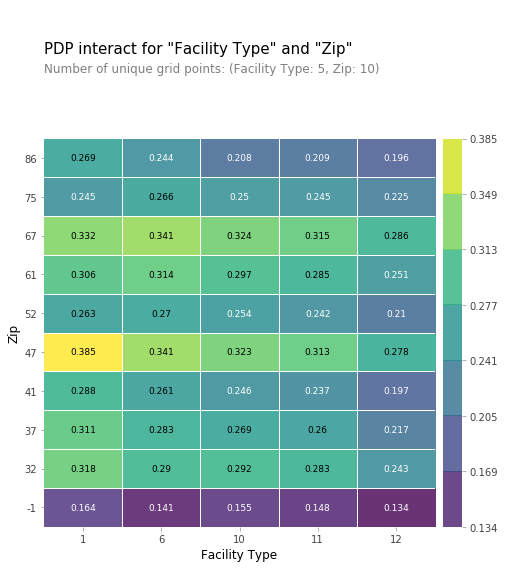

In [21]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features= ['Facility Type', 'Zip']

interaction = pdp_interact(
    model=best,
    dataset=X_test,
    model_features=X_test.columns,
    features=features,
    num_grid_points=[10, 10]
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

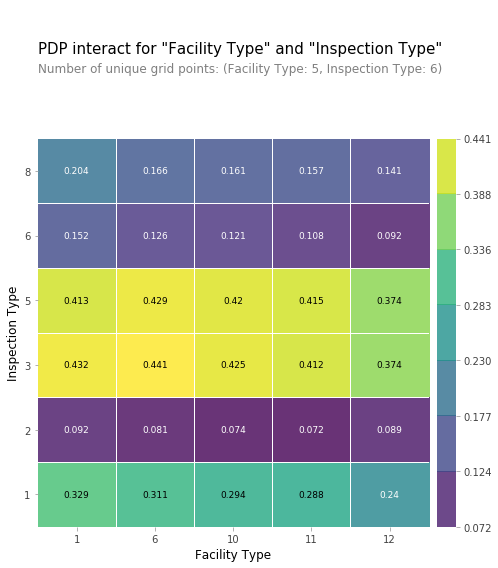

In [22]:
features= ['Facility Type', 'Inspection Type']

interaction = pdp_interact(
    model=best,
    dataset=X_test,
    model_features=X_test.columns,
    features=features,
    num_grid_points=[10, 10]
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

###Shapley Values

In [0]:
!pip install shap

In [24]:
import numpy as np
import shap

threshold = .5

y_pred = (y_pred_proba >= threshold).astype(int)
confidence = np.abs(y_pred_proba - 0.5)
preds = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 
                      'y_pred_proba': y_pred_proba, 
                      'confidence': confidence})

preds.head()

,y_test,y_pred,y_pred_proba,confidence
0,0,0,0.116557,0.383443
1,0,0,0.311498,0.188502
2,0,0,0.385007,0.114993
3,1,0,0.078378,0.421622
4,1,0,0.321933,0.178067


True Positive sample:

In [25]:
true_pos = preds[(y_pred==1) & (y_test==1)]

data_for_prediction = X_test[X_test.index == true_pos.sample(n=1).index[0]]

shap.initjs()

explainer = shap.TreeExplainer(best)
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

True Negative Sample:

In [26]:
true_neg = preds[(y_pred==0) & (y_test==0)]

data_for_prediction = X_test[X_test.index == true_neg.sample(n=1).index[0]]

shap.initjs()

explainer = shap.TreeExplainer(best)
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

False Positive Sample:

In [27]:
false_pos = preds[(y_pred==1) & (y_test==0)]

data_for_prediction = X_test[X_test.index == false_pos.sample(n=1).index[0]]

shap.initjs()

explainer = shap.TreeExplainer(best)
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

False Negative Sample:

In [28]:
false_neg = preds[(y_pred==0) & (y_test==1)]

data_for_prediction = X_test[X_test.index == false_neg.sample(n=1).index[0]]

shap.initjs()

explainer = shap.TreeExplainer(best)
shap_values = explainer.shap_values(data_for_prediction)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

###Part 4: Gradient Descent
Answer both of these two questions:

One sentence is sufficient for each.

To earn a score of 3 for this part, go above and beyond. Show depth of understanding and mastery of intuition in your answers.

-- What does Gradient Descent seek to minimize?

- Gradient descent seeks to minimize the value of a given function, typically (but not always) used in the context of minimizing a cost or an error.

-- What is the "Learning Rate" and what is its function?

- The learning rate, also referred to as the alpha, is basically the magnitude of the size of the step the gradient descent algorith should take in the direction of the local minimum. When the learning rate is very small, the algorithm takes very small steps towards the minimum, and can be computationally expensive and time consuming to reach the minimum. However, if the learning rate is too large, the algorithm can 'overshoot' the local minimum and end up bouncing back and forth across the minimum and fail to converge at the minimum.
